In [1]:


import numpy as np 
import pandas as pd


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/titanic/train_and_test2.csv
/kaggle/input/titanic-dataset/Titanic-Dataset.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, plot_confusion_matrix, confusion_matrix

In [3]:
df_titanic=pd.read_csv('/kaggle/input/titanic-dataset/Titanic-Dataset.csv')
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_titanic=df_titanic.drop(columns=['PassengerId','Name','Ticket','Cabin'])

In [5]:
df_titanic.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [6]:
df_titanic=df_titanic.dropna()
df_titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [7]:
df_titanic= pd.get_dummies(df_titanic, drop_first=True)
df_titanic=df_titanic.drop(columns=['Embarked_S'])
df_titanic

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q
0,0,3,22.0,1,0,7.2500,1,0
1,1,1,38.0,1,0,71.2833,0,0
2,1,3,26.0,0,0,7.9250,0,0
3,1,1,35.0,1,0,53.1000,0,0
4,0,3,35.0,0,0,8.0500,1,0
...,...,...,...,...,...,...,...,...
885,0,3,39.0,0,5,29.1250,0,1
886,0,2,27.0,0,0,13.0000,1,0
887,1,1,19.0,0,0,30.0000,0,0
889,1,1,26.0,0,0,30.0000,1,0


In [8]:
X = df_titanic[['Pclass', 'Sex_male', 'Age', 'SibSp','Parch','Fare','Embarked_Q']]
y = df_titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=21, stratify=y)

lr = LogisticRegression(max_iter=150)
lr.fit(X_train, y_train)
y_test_pred = lr.predict(X_test)
accuracy_score(y_test_pred, y_test)

0.8370786516853933

In [9]:
y_test.shape

(178,)

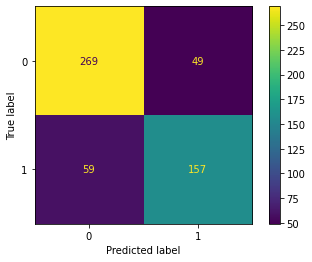

In [10]:
plot_confusion_matrix(lr, X_train, y_train)
plt.show()